In [3]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')



In [4]:
wine= pd.read_csv("Wine_Quality_Data.csv")

In [5]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.shape

(6497, 12)

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [8]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

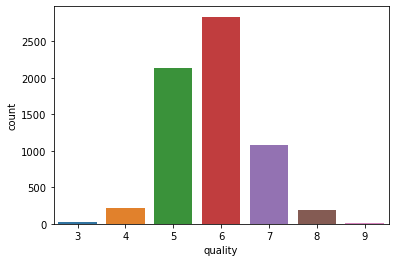

In [10]:
sns.countplot(wine['quality'])
plt.show()

In [11]:
correlations = wine.corr()['quality'].sort_values(ascending=False)
correlations

quality                 1.000000
alcohol                 0.444319
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

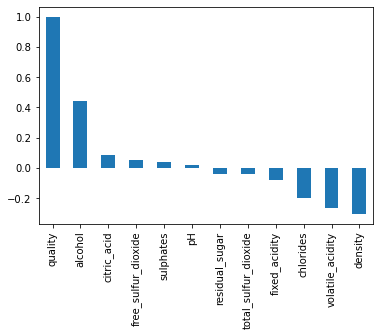

In [12]:
correlations.plot(kind='bar')

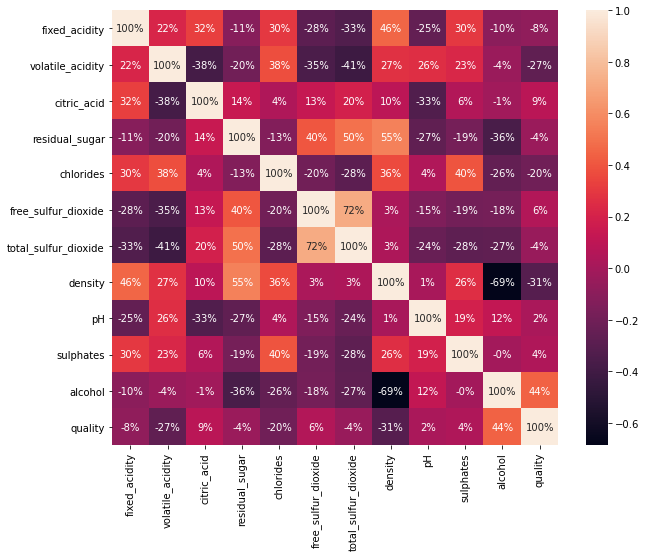

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(), annot=True, fmt='.0%')

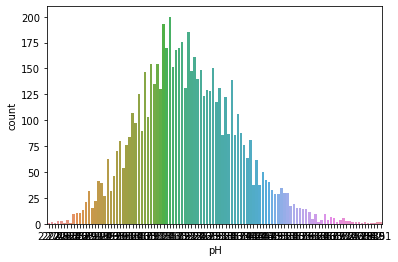

In [14]:
sns.countplot(wine['pH'])
plt.show()

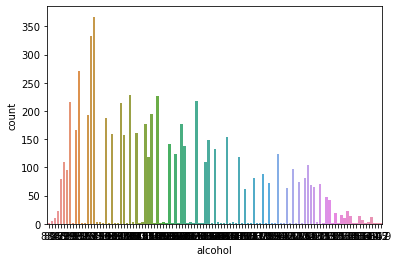

In [15]:
sns.countplot(wine['alcohol'])
plt.show()

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

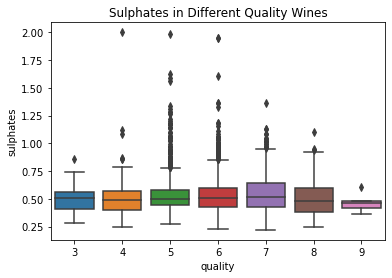

In [16]:
SCA = sns.boxplot(x='quality',y='sulphates', data=wine)
SCA.set(title="Sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'alcohol in Different Quality Wines')]

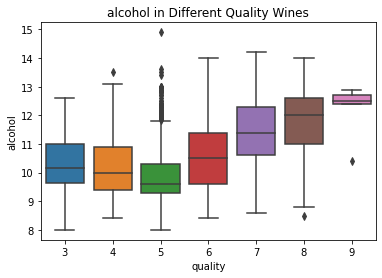

In [17]:
SCA = sns.boxplot(x='quality',y='alcohol', data=wine)
SCA.set(title="alcohol in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

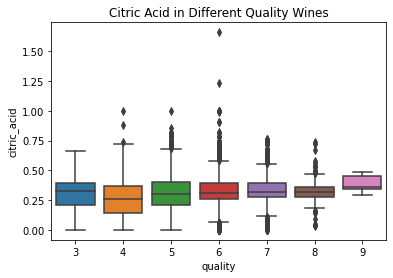

In [18]:
SCA = sns.boxplot(x='quality',y='citric_acid', data=wine)
SCA.set(title="Citric Acid in Different Quality Wines")

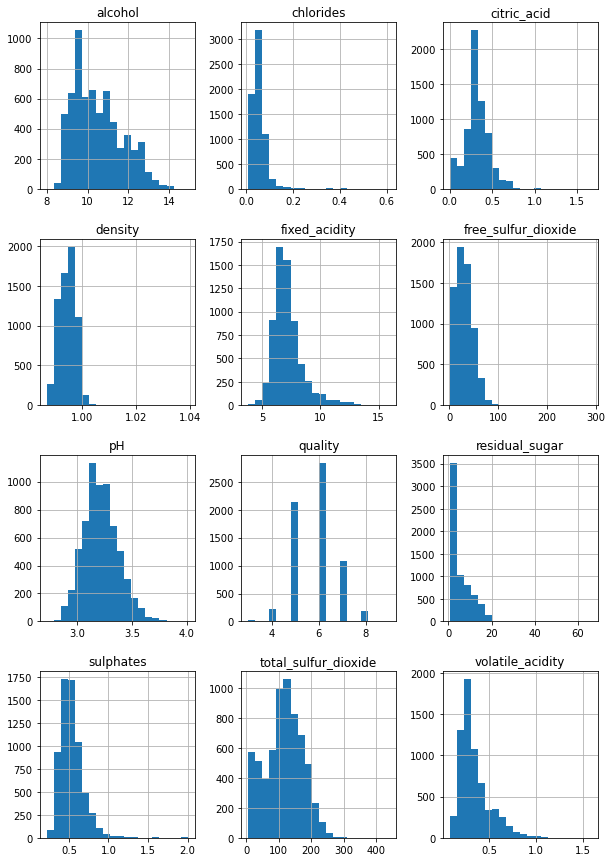

In [19]:
wine.hist(figsize=(10,15),bins=20)
plt.show()

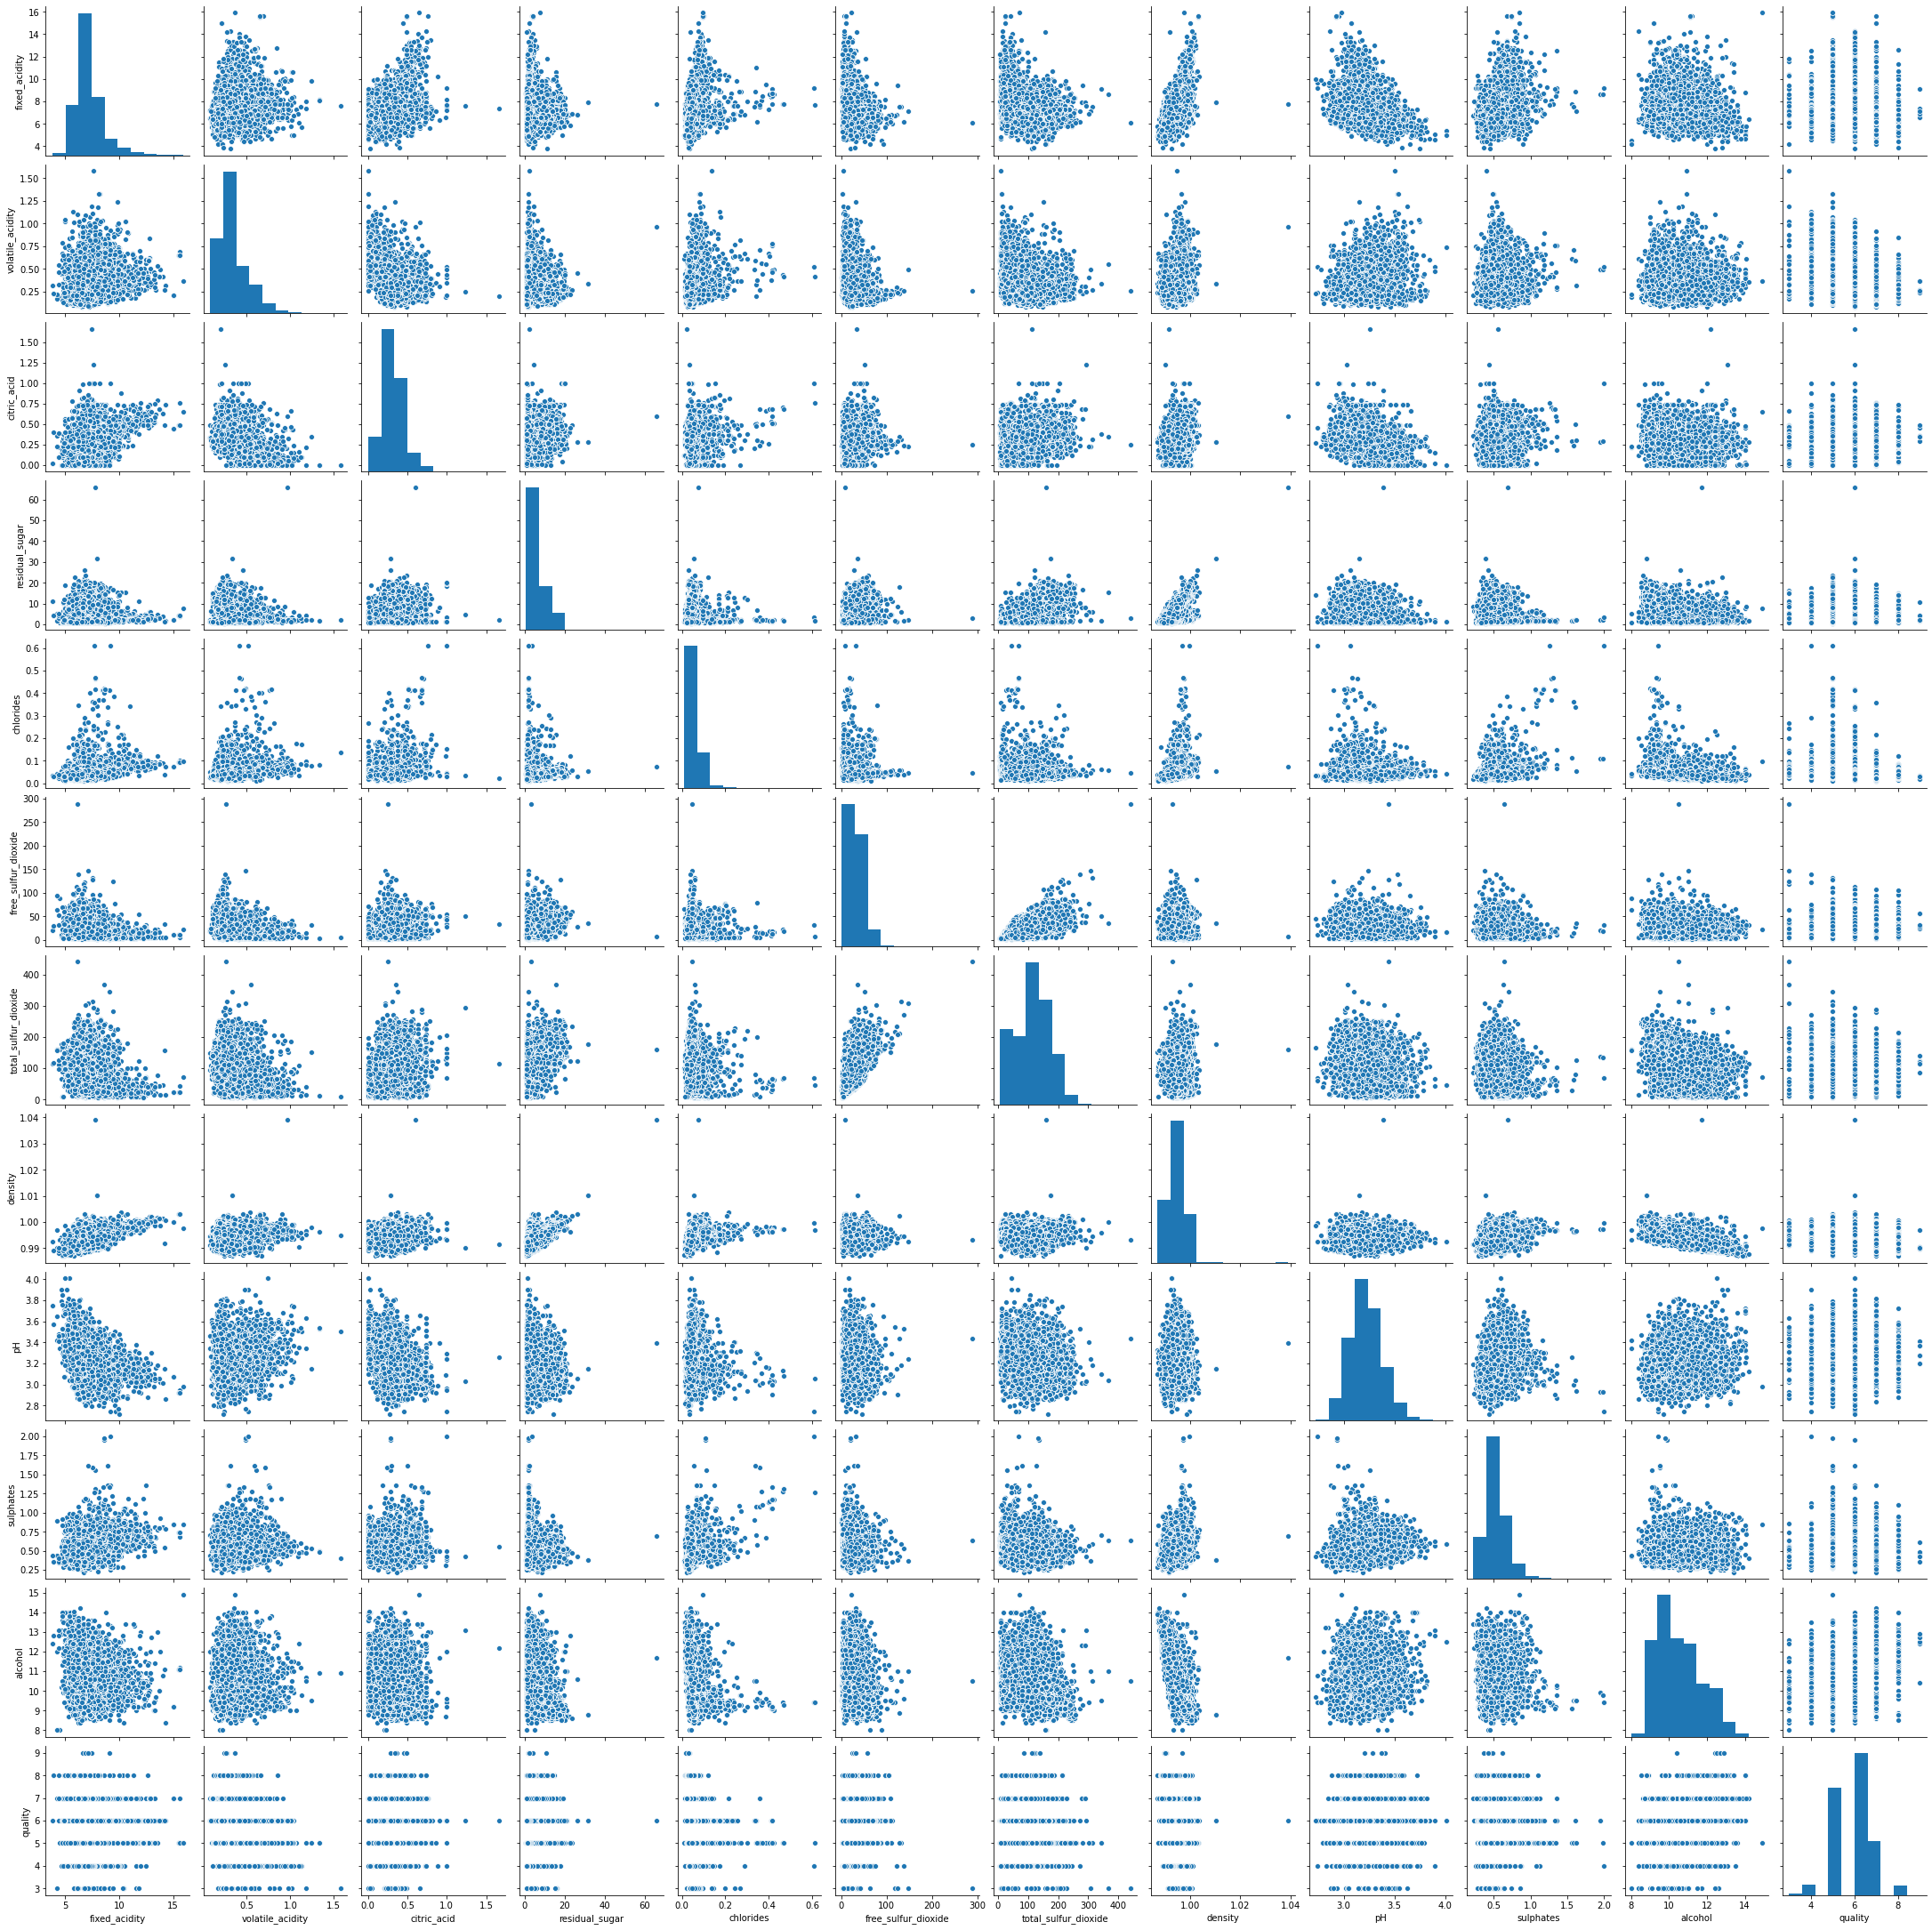

In [20]:
sns.pairplot(wine)

In [21]:
wine_w = wine.copy()
wine_w['quality'].replace([3,4],['low','low'],inplace=True)
wine_w['quality'].replace([5,6],['med','med'],inplace=True)
wine_w['quality'].replace([7,8],['high','high'],inplace=True)

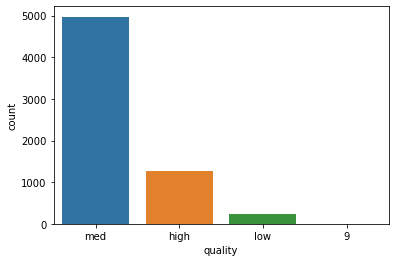

In [22]:
sns.countplot(wine_w['quality'])

In [23]:
skew_vals=wine.skew()

In [24]:
skew_vals

fixed_acidity           1.723290
volatile_acidity        1.495097
citric_acid             0.471731
residual_sugar          1.435404
chlorides               5.399828
free_sulfur_dioxide     1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [25]:
# Define features X
X = np.asarray(wine.iloc[:,:-1])
# Define target y
y = np.asarray(wine['quality'])

In [26]:
pip install -U pandas-profiling[notebook]


  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.1.0
    Uninstalling tangled-up-in-unicode-0.1.0:
      Successfully uninstalled tangled-up-in-unicode-0.1.0
  Attempting uninstall: visions
    Found existing installation: visions 0.7.1
    Uninstalling visions-0.7.1:
      Successfully uninstalled visions-0.7.1
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Anuradha\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [27]:

from pandas_profiling import ProfileReport
report = ProfileReport(wine)
report


ImportError: cannot import name 'soft_unicode' from 'markupsafe' (C:\Users\Anuradha\anaconda3\lib\site-packages\markupsafe\__init__.py)

In [28]:
X=wine.drop('quality',axis=1) 
y=wine['quality']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state= 300)

LogisticRegression


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial',solver ='newton-cg')

from sklearn.metrics import accuracy_score

model.fit(X_train,y_train)
pred_y= model.predict(X_test)

print(metrics.classification_report(y_test, pred_y, digits=2, zero_division = 1))

print("Accuracy Score:",accuracy_score(y_test,pred_y))






              precision    recall  f1-score   support

           3       1.00      0.00      0.00         5
           4       1.00      0.00      0.00        67
           5       0.61      0.62      0.62       662
           6       0.52      0.72      0.60       832
           7       0.52      0.20      0.29       331
           8       1.00      0.00      0.00        52
           9       1.00      0.00      0.00         1

    accuracy                           0.55      1950
   macro avg       0.81      0.22      0.22      1950
weighted avg       0.58      0.55      0.52      1950

Accuracy Score: 0.5523076923076923


SVC

In [31]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion='entropy',random_state=0)
model1.fit(X_train,y_train)
pred_y = model1.predict(X_test)

print(metrics.classification_report(y_test, pred_y, digits=3, zero_division = 1))

print("Accuracy Score:",accuracy_score(y_test,pred_y))


              precision    recall  f1-score   support

           3      0.000     0.000     0.000         5
           4      0.186     0.164     0.175        67
           5      0.672     0.653     0.662       662
           6      0.627     0.620     0.624       832
           7      0.501     0.541     0.520       331
           8      0.375     0.404     0.389        52
           9      0.000     0.000     0.000         1

    accuracy                          0.594      1950
   macro avg      0.337     0.340     0.338      1950
weighted avg      0.597     0.594     0.596      1950

Accuracy Score: 0.5943589743589743


In [ ]:
import warnings
warnings.simplefilter('ignore')
import xgboost as xgb
from xgboost import XGBClassifier
model = xgb.XGBClassifier(random_state=1)
model.fit(X_train, y_train)
pred_y = model.predict(X_test)

print(metrics.classification_report(y_test, pred_y, digits=2, zero_division = 1))

print("Accuracy Score:",accuracy_score(y_test,pred_y))
